In [4]:
#Logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#Get Dataset
x=np.arange(10).reshape(-1,1)
y=np.array([0,1,0,0,1,1,1,1,1,1])
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 1 0 0 1 1 1 1 1 1]


In [6]:
#create a model and train it 
model=LogisticRegression(solver='liblinear',C=10.0,random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [7]:
#Evaluate the Model
p_pred=model.predict_proba(x)
y_pred=model.predict(x)
score_=model.score(x,y)
conf_m=confusion_matrix(y,y_pred)
report=classification_report(y, y_pred)

In [8]:
#Get the trained data
print('x:',x,sep='\n')
print('y:',y,sep='\n',end='\n\n')
      

x:
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
y:
[0 1 0 0 1 1 1 1 1 1]



In [9]:
model

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [10]:
print('intercept:',model.intercept_)
print('coef:',model.coef_,end='\n\n')

intercept: [-1.51632619]
coef: [[0.703457]]



In [11]:
print('y_actual:',y)
print('y_pred:',y_pred)

y_actual: [0 1 0 0 1 1 1 1 1 1]
y_pred: [0 0 0 1 1 1 1 1 1 1]


In [12]:
print('conf_m:', conf_m, sep='\n',end='\n\n')

conf_m:
[[2 1]
 [1 6]]



In [13]:
print('report:',report,sep='\n',end='\n\n')

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10




In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn import svm,metrics
import seaborn as sns
sns.set()

In [2]:
breast_cancer=load_breast_cancer()
X=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
X=X[['mean area','mean compactness']]
y=pd.Categorical.from_codes(breast_cancer.target,breast_cancer.target_names)
y=pd.get_dummies(y, drop_first=True)

In [3]:
X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=1)

In [4]:
#Build a Model
knn=KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [5]:
y_pred=knn.predict(X_test)

In [7]:
X.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


<Axes: xlabel='mean area', ylabel='mean compactness'>

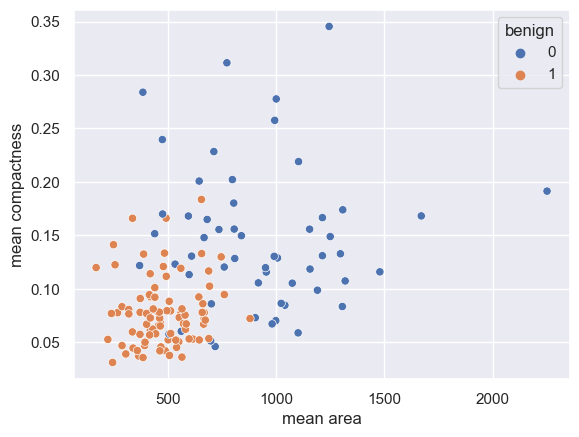

In [8]:
sns.scatterplot(x='mean area',
                y='mean compactness',
                hue='benign',
                data=X_test.join(y_test, how='outer'))

In [9]:
y_pred=knn.predict(X_test)

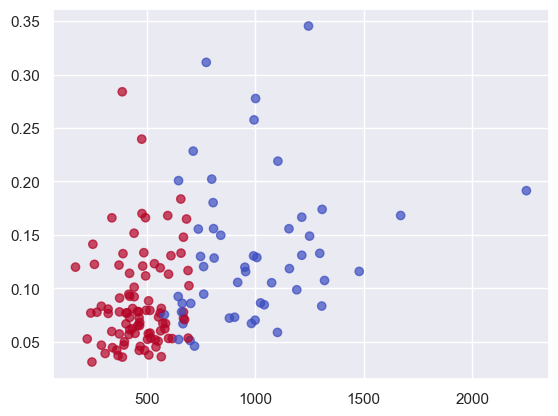

In [10]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [11]:
confusion_matrix(y_test,y_pred)

array([[42, 13],
       [ 9, 79]])

In [12]:
#To solve the above Confusion Matrix we have to use 'SUPPORT VECTOR MACHINES

def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
    return xx,yy

def plot_contours(ax, clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=ax.contourf(xx,yy,7, **params)
    return out

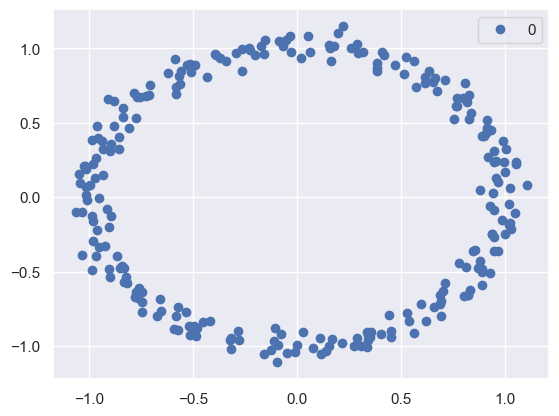

In [14]:
samples=500
train_prop=0.8
#To make a Data
x,y=make_circles(n_samples=samples, noise=0.05,random_state=123)


#PLOT IT
df=pd.DataFrame(dict(x=x[:, 0], y=x[:,1],label=y))
groups=df.groupby('label')
fig,ax=plt.subplots()
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x,group.y,marker='o',linestyle='',ms=6,label=name)
    ax.legend()
    plt.show()